<a href="https://colab.research.google.com/github/AnweshaC21/Air-pollution-analysis-and-the-effect-of-Covid/blob/main/Pollutants_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#PM2.5

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Covid Pollutants Analysis/Alipur.csv', parse_dates=[0])     #daily data for PM2.5, PM10, NO2
df2 = pd.read_csv('/content/gdrive/MyDrive/Covid Pollutants Analysis/Alipur_2.csv', parse_dates=[0])  #8 hrs data for CO, Ozone

###combining datasets

In [ ]:
df2.head()

,Date,CO,Ozone
0,2019-01-01 00:00:00,2.16,6.27
1,2019-01-01 08:00:00,1.26,47.42
2,2019-01-01 16:00:00,1.70,16.23
3,2019-02-01 00:00:00,1.79,1.32
4,2019-02-01 08:00:00,1.68,50.98


In [ ]:
df2.tail()

,Date,CO,Ozone
1090,2019-12-30 08:00:00,2.28,5.21
1091,2019-12-30 16:00:00,2.30,4.52
1092,2019-12-31 00:00:00,1.45,11.38
1093,2019-12-31 08:00:00,0.72,36.34
1094,2019-12-31 16:00:00,2.24,15.97


In [ ]:
#converting 8 hrs data to daily data

df['CO'] = np.NaN
df['Ozone'] = np.NaN

i=0
j=0
while (i < len(df2)):
  df['CO'][j] = (df2['CO'][i] + df2['CO'][i+1] + df2['CO'][i+2])/3
  df['Ozone'][j] = (df2['Ozone'][i] + df2['Ozone'][i+1] + df2['Ozone'][i+2])/3
  i+=3
  j+=1  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


###describe dataset

In [ ]:
df.head()

,Date,PM25,PM10,NO2,CO,Ozone
0,2019-01-01,309.79,455.43,109.48,1.706667,23.306667
1,2019-02-01,339.24,468.76,114.94,1.896667,22.316667
2,2019-03-01,367.25,509.33,110.51,1.973333,19.536667
3,2019-04-01,222.16,345.14,99.70,1.356667,12.353333
4,2019-05-01,226.40,327.51,94.90,1.403333,19.816667


In [ ]:
df.tail()

,Date,PM25,PM10,NO2,CO,Ozone
360,2019-12-27,193.14,312.09,59.16,1.000000,9.116667
361,2019-12-28,216.47,303.81,55.15,1.190000,11.600000
362,2019-12-29,245.57,353.35,55.37,1.543333,24.960000
363,2019-12-30,243.46,315.16,65.61,2.450000,3.866667
364,2019-12-31,232.97,303.78,59.11,1.470000,21.230000


In [ ]:
df.shape

(365, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    365 non-null    datetime64[ns]
 1   PM25    365 non-null    float64       
 2   PM10    365 non-null    float64       
 3   NO2     365 non-null    float64       
 4   CO      365 non-null    float64       
 5   Ozone   365 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 17.2 KB


In [ ]:
df.describe()

,PM25,PM10,NO2,CO,Ozone
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,105.419192,202.835384,54.502384,0.865470,35.417274
std,86.229825,124.885371,20.547041,0.478790,17.063548
min,9.840000,9.960000,17.520000,0.253333,1.400000
25%,46.960000,99.940000,39.360000,0.556667,23.740000
50%,79.840000,188.880000,50.820000,0.726667,33.253333
75%,136.410000,288.110000,66.110000,1.000000,44.880000
max,715.040000,771.790000,119.700000,2.753333,110.712500


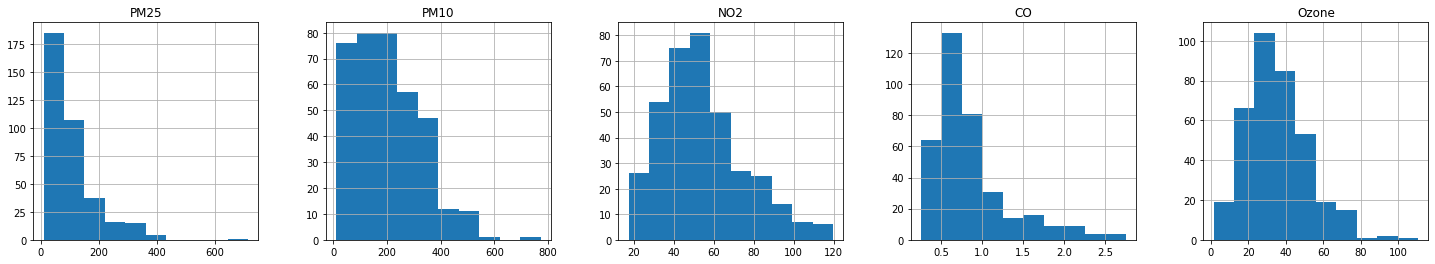

In [ ]:
# univariate plots
df.drop(['Date'], axis=1).hist(figsize=(25,4), layout=(1,5))
plt.show()

###ML models

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df.columns

Index(['Date', 'PM25', 'PM10', 'NO2', 'CO', 'Ozone'], dtype='object')

In [ ]:
col_ = df.columns.tolist()[2:]
#col_.remove('PM25')

In [ ]:
col_

['PM10', 'NO2', 'CO', 'Ozone']

In [ ]:
#defining feature (X) and target (y)
X = df[col_]    #X-input features
y = df.iloc[:,1]  #y-input features

#Normalize Feature variable
ss = StandardScaler()
X_std = ss.fit_transform(X)     #apply stardardisation

#Train test split with test size 20% and train size as 80%
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=1)

print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)
print('Training data size:',y_train.shape)
print('Test data size:',y_test.shape)

Training data size: (292, 4)
Test data size: (73, 4)
Training data size: (292,)
Test data size: (73,)


In [ ]:
names = []
r2_val = []
rmse_val = []
mae_val = []

In [ ]:
#Linear Regression

lr = LinearRegression()
lr_model = lr.fit(X_train,y_train)          #fit the linear model on train data

#Prediction
y_pred = lr_model.predict(X_test)                   #predict using the model

r2 = r2_score(y_test,y_pred)                        #calculate r2
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))   #calculate rmse
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,y_pred)            #calculate mae
print('MAE of model:',mae)

name = 'Linear Regression'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.8282338030220013
RMSE of model: 34.15697252935138
MAE of model: 23.64052990140048


In [ ]:
#Ada Boost Regressor

abr = AdaBoostRegressor()
abr_model = abr.fit(X_train,y_train)

y_pred = abr_model.predict(X_test)
r2 = r2_score(y_test,y_pred)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,y_pred)
print('MAE of model:',mae)

name = 'AdaBoost'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.8841341370721225
RMSE of model: 28.05357869870067
MAE of model: 22.704735722524777


In [ ]:
#Decision Tree Regression

dt_one_reg = DecisionTreeRegressor()

dt_model = dt_one_reg.fit(X_train,y_train)
y_pred_dtone = dt_model.predict(X_test)
r2 = r2_score(y_pred_dtone,y_test)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_pred_dtone,y_test))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_pred_dtone,y_test)
print('MAE of model:',mae)

name = 'Decision Tree'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.5848421543771802
RMSE of model: 54.73030580523232
MAE of model: 28.849945205479457


In [ ]:
#Random Forest Regression

rf_reg=RandomForestRegressor()

#Fit the RF model and predict
rf_model = rf_reg.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)

r2 = r2_score(y_test,y_pred_rf)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,y_pred_rf)
print('MAE of model:',mae)

name = 'Random Forest'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.8905827226426393
RMSE of model: 27.26173377334639
MAE of model: 16.440955753424657


In [ ]:
#Support Vector Machine

sv_reg = SVR()
sv_model = sv_reg.fit(X_train,y_train)

y_pred_sv=sv_model.predict(X_test)

r2 = r2_score(y_test,y_pred_sv)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_sv))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,y_pred_sv)
print('MAE of model:',mae)

name = 'Support Vector Machine'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.2752633453195694
RMSE of model: 70.16178570763094
MAE of model: 44.55104063891028


In [ ]:
#KNN REGRESSOR

knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

r2 = r2_score(y_test, pred)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,pred)
print('MAE of model:',mae)

R^2 of model: 0.9118822466901355
RMSE of model: 24.46483145783502
MAE of model: 16.293246575342465


In [ ]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

r2 = r2_score(y_test, pred)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,pred)
print('MAE of model:',mae)

name = 'KNN'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.8734130393108924
RMSE of model: 29.322770865543323
MAE of model: 19.274772994129158


In [ ]:
for i in range(6):
    print('%s: %f' % (names[i], r2_val[i]))

Linear Regression: 0.828234
AdaBoost: 0.884134
Decision Tree: 0.584842
Random Forest: 0.890583
Support Vector Machine: 0.275263
KNN: 0.873413


In [ ]:
for i in range(6):
    print('%s: %f' % (names[i], rmse_val[i]))

Linear Regression: 34.156973
AdaBoost: 28.053579
Decision Tree: 54.730306
Random Forest: 27.261734
Support Vector Machine: 70.161786
KNN: 29.322771


In [ ]:
for i in range(6):
    print('%s: %f' % (names[i], mae_val[i]))

Linear Regression: 23.640530
AdaBoost: 22.704736
Decision Tree: 28.849945
Random Forest: 16.440956
Support Vector Machine: 44.551041
KNN: 19.274773


In [ ]:
r2_val = list(np.around(np.array(r2_val),3))
rmse_val = list(np.around(np.array(rmse_val),3))
mae_val = list(np.around(np.array(mae_val),3))

In [ ]:
from prettytable import PrettyTable
t = PrettyTable(['Regression Model','R^2', 'RMSE', 'MAE'])
t.title = 'PM2.5'
for i in range(6):
  t.add_row([names[i], r2_val[i], rmse_val[i], mae_val[i]])
print(t)

+--------------------------------------------------+
|                      PM2.5                       |
+------------------------+-------+--------+--------+
|    Regression Model    |  R^2  |  RMSE  |  MAE   |
+------------------------+-------+--------+--------+
|   Linear Regression    | 0.828 | 34.157 | 23.641 |
|        AdaBoost        | 0.884 | 28.054 | 22.705 |
|     Decision Tree      | 0.585 | 54.73  | 28.85  |
|     Random Forest      | 0.891 | 27.262 | 16.441 |
| Support Vector Machine | 0.275 | 70.162 | 44.551 |
|          KNN           | 0.873 | 29.323 | 19.275 |
+------------------------+-------+--------+--------+


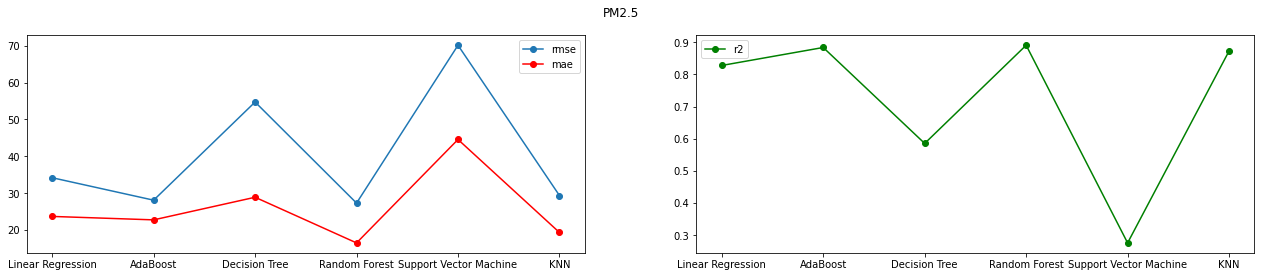

In [ ]:
plt.figure(figsize=(22,4))
plt.suptitle('PM2.5')

plt.subplot(1,2,1)
plt.plot(names, rmse_val, marker='o', label='rmse')
plt.plot(names, mae_val, marker='o', color='r', label='mae')
plt.legend()

plt.subplot(1,2,2)
plt.plot(names, r2_val, marker='o', color='g', label='r2')
plt.legend()
plt.show()

#PM10

In [ ]:
df.columns

Index(['Date', 'PM25', 'PM10', 'NO2', 'CO', 'Ozone'], dtype='object')

In [ ]:
col_ = ['PM25', 'NO2', 'CO', 'Ozone']

In [ ]:
#defining feature (X) and target (y)
X = df[col_]    #X-input features
y = df.iloc[:,2]  #y-input features

#Normalize Feature variable
ss = StandardScaler()
X_std = ss.fit_transform(X)     #apply stardardisation

#Train test split with test size 20% and train size as 80%
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=1)

print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)
print('Training data size:',y_train.shape)
print('Test data size:',y_test.shape)

Training data size: (292, 4)
Test data size: (73, 4)
Training data size: (292,)
Test data size: (73,)


In [ ]:
names = []
r2_val = []
rmse_val = []
mae_val = []

In [ ]:
#Linear Regression

lr = LinearRegression()
lr_model = lr.fit(X_train,y_train)          #fit the linear model on train data

#Prediction
y_pred = lr_model.predict(X_test)                   #predict using the model

r2 = r2_score(y_test,y_pred)                        #calculate r2
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))   #calculate rmse
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,y_pred)            #calculate mae
print('MAE of model:',mae)

name = 'Linear Regression'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.7109479493449284
RMSE of model: 67.25462736540581
MAE of model: 43.09348132127847


In [ ]:
#Ada Boost Regressor

abr = AdaBoostRegressor()
abr_model = abr.fit(X_train,y_train)

y_pred = abr_model.predict(X_test)
r2 = r2_score(y_test,y_pred)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,y_pred)
print('MAE of model:',mae)

name = 'AdaBoost'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.7531354682707336
RMSE of model: 62.15319977559358
MAE of model: 47.44831644122215


In [ ]:
#Decision Tree Regression

dt_one_reg = DecisionTreeRegressor()

dt_model = dt_one_reg.fit(X_train,y_train)
y_pred_dtone = dt_model.predict(X_test)
r2 = r2_score(y_pred_dtone,y_test)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_pred_dtone,y_test))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_pred_dtone,y_test)
print('MAE of model:',mae)

name = 'Decision Tree'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.7994757185527387
RMSE of model: 53.23256330377498
MAE of model: 33.24835616438355


In [ ]:
#Random Forest Regression

rf_reg=RandomForestRegressor()

#Fit the RF model and predict
rf_model = rf_reg.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)

r2 = r2_score(y_test,y_pred_rf)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,y_pred_rf)
print('MAE of model:',mae)

name = 'Random Forest'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.8208182223239222
RMSE of model: 52.95184097844645
MAE of model: 34.20541438356166


In [ ]:
#Support Vector Machine

sv_reg = SVR()
sv_model = sv_reg.fit(X_train,y_train)

y_pred_sv=sv_model.predict(X_test)

r2 = r2_score(y_test,y_pred_sv)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_sv))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,y_pred_sv)
print('MAE of model:',mae)

name = 'Support Vector Machine'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.21402833502816676
RMSE of model: 110.90154287864586
MAE of model: 89.81969579918753


In [ ]:
#KNN REGRESSOR

knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

r2 = r2_score(y_test, pred)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,pred)
print('MAE of model:',mae)

R^2 of model: 0.709021725765425
RMSE of model: 67.47834544838851
MAE of model: 41.30020547945205


In [ ]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

r2 = r2_score(y_test, pred)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,pred)
print('MAE of model:',mae)

name = 'KNN'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.7016239111356131
RMSE of model: 68.33074437257102
MAE of model: 47.37222113502936


In [ ]:
for i in range(6):
    print('%s: %f' % (names[i], r2_val[i]))

Linear Regression: 0.710948
AdaBoost: 0.753135
Decision Tree: 0.799476
Random Forest: 0.820818
Support Vector Machine: 0.214028
KNN: 0.701624


In [ ]:
for i in range(6):
    print('%s: %f' % (names[i], rmse_val[i]))

Linear Regression: 67.254627
AdaBoost: 62.153200
Decision Tree: 53.232563
Random Forest: 52.951841
Support Vector Machine: 110.901543
KNN: 68.330744


In [ ]:
for i in range(6):
    print('%s: %f' % (names[i], mae_val[i]))

Linear Regression: 43.093481
AdaBoost: 47.448316
Decision Tree: 33.248356
Random Forest: 34.205414
Support Vector Machine: 89.819696
KNN: 47.372221


In [ ]:
r2_val = list(np.around(np.array(r2_val),3))
rmse_val = list(np.around(np.array(rmse_val),3))
mae_val = list(np.around(np.array(mae_val),3))

In [ ]:
from prettytable import PrettyTable
t = PrettyTable(['Regression Model','R^2', 'RMSE', 'MAE'])
t.title = 'PM10'
for i in range(6):
  t.add_row([names[i], r2_val[i], rmse_val[i], mae_val[i]])
print(t)

+---------------------------------------------------+
|                        PM10                       |
+------------------------+-------+---------+--------+
|    Regression Model    |  R^2  |   RMSE  |  MAE   |
+------------------------+-------+---------+--------+
|   Linear Regression    | 0.711 |  67.255 | 43.093 |
|        AdaBoost        | 0.753 |  62.153 | 47.448 |
|     Decision Tree      | 0.799 |  53.233 | 33.248 |
|     Random Forest      | 0.821 |  52.952 | 34.205 |
| Support Vector Machine | 0.214 | 110.902 | 89.82  |
|          KNN           | 0.702 |  68.331 | 47.372 |
+------------------------+-------+---------+--------+


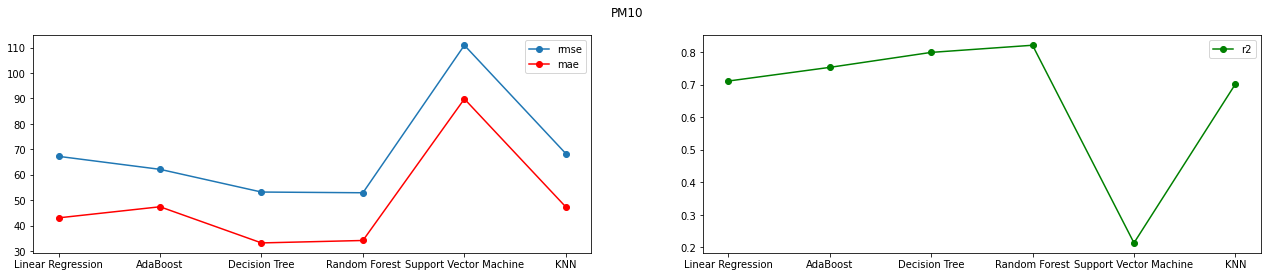

In [ ]:
plt.figure(figsize=(22,4))
plt.suptitle('PM10')

plt.subplot(1,2,1)
plt.plot(names, rmse_val, marker='o', label='rmse')
plt.plot(names, mae_val, marker='o', color='r', label='mae')
plt.legend()

plt.subplot(1,2,2)
plt.plot(names, r2_val, marker='o', color='g', label='r2')
plt.legend()
plt.show()

#NO2

In [ ]:
df.columns

Index(['Date', 'PM25', 'PM10', 'NO2', 'CO', 'Ozone'], dtype='object')

In [ ]:
col_ = ['PM25', 'PM10', 'CO', 'Ozone']

In [ ]:
col_

['PM25', 'PM10', 'CO', 'Ozone']

In [ ]:
#defining feature (X) and target (y)
X = df[col_]    #X-input features
y = df.iloc[:,3]  #y-input features

#Normalize Feature variable
ss = StandardScaler()
X_std = ss.fit_transform(X)     #apply stardardisation

#Train test split with test size 20% and train size as 80%
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=1)

print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)
print('Training data size:',y_train.shape)
print('Test data size:',y_test.shape)

Training data size: (292, 4)
Test data size: (73, 4)
Training data size: (292,)
Test data size: (73,)


In [ ]:
names = []
r2_val = []
rmse_val = []
mae_val = []

In [ ]:
#Linear Regression

lr = LinearRegression()
lr_model = lr.fit(X_train,y_train)          #fit the linear model on train data

#Prediction
y_pred = lr_model.predict(X_test)                   #predict using the model

r2 = r2_score(y_test,y_pred)                        #calculate r2
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))   #calculate rmse
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,y_pred)            #calculate mae
print('MAE of model:',mae)

name = 'Linear Regression'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.5859168828852905
RMSE of model: 14.313735555435747
MAE of model: 11.096554667944774


In [ ]:
#Ada Boost Regressor

abr = AdaBoostRegressor()
abr_model = abr.fit(X_train,y_train)

y_pred = abr_model.predict(X_test)
r2 = r2_score(y_test,y_pred)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,y_pred)
print('MAE of model:',mae)

name = 'AdaBoost'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.6345219763146048
RMSE of model: 13.447447621386763
MAE of model: 11.311860803366576


In [ ]:
#Decision Tree Regression

dt_one_reg = DecisionTreeRegressor()

dt_model = dt_one_reg.fit(X_train,y_train)
y_pred_dtone = dt_model.predict(X_test)
r2 = r2_score(y_pred_dtone,y_test)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_pred_dtone,y_test))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_pred_dtone,y_test)
print('MAE of model:',mae)

name = 'Decision Tree'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.26359643267239175
RMSE of model: 18.193632172176024
MAE of model: 13.36364383561644


In [ ]:
#Random Forest Regression

rf_reg=RandomForestRegressor()

#Fit the RF model and predict
rf_model = rf_reg.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)

r2 = r2_score(y_test,y_pred_rf)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,y_pred_rf)
print('MAE of model:',mae)

name = 'Random Forest'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.6421874883153642
RMSE of model: 13.3056773717235
MAE of model: 10.41455041095891


In [ ]:
#Support Vector Machine

sv_reg = SVR()
sv_model = sv_reg.fit(X_train,y_train)

y_pred_sv=sv_model.predict(X_test)

r2 = r2_score(y_test,y_pred_sv)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_sv))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,y_pred_sv)
print('MAE of model:',mae)

name = 'Support Vector Machine'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.47177058070729927
RMSE of model: 16.166668013195515
MAE of model: 12.375270296100064


In [ ]:
#KNN REGRESSOR

knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

r2 = r2_score(y_test, pred)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,pred)
print('MAE of model:',mae)

R^2 of model: 0.4018976507433599
RMSE of model: 17.202714493111454
MAE of model: 12.494835616438356


In [ ]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

r2 = r2_score(y_test, pred)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,pred)
print('MAE of model:',mae)

name = 'KNN'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.6370194369603055
RMSE of model: 13.401422908525864
MAE of model: 10.228230919765167


In [ ]:
for i in range(6):
    print('%s: %f' % (names[i], r2_val[i]))

Linear Regression: 0.585917
AdaBoost: 0.634522
Decision Tree: 0.263596
Random Forest: 0.642187
Support Vector Machine: 0.471771
KNN: 0.637019


In [ ]:
for i in range(6):
    print('%s: %f' % (names[i], rmse_val[i]))

Linear Regression: 14.313736
AdaBoost: 13.447448
Decision Tree: 18.193632
Random Forest: 13.305677
Support Vector Machine: 16.166668
KNN: 13.401423


In [ ]:
for i in range(6):
    print('%s: %f' % (names[i], mae_val[i]))

Linear Regression: 11.096555
AdaBoost: 11.311861
Decision Tree: 13.363644
Random Forest: 10.414550
Support Vector Machine: 12.375270
KNN: 10.228231


In [ ]:
r2_val = list(np.around(np.array(r2_val),3))
rmse_val = list(np.around(np.array(rmse_val),3))
mae_val = list(np.around(np.array(mae_val),3))

In [ ]:
from prettytable import PrettyTable
t = PrettyTable(['Regression Model','R^2', 'RMSE', 'MAE'])
t.title = 'NO2'
for i in range(6):
  t.add_row([names[i], r2_val[i], rmse_val[i], mae_val[i]])
print(t)

+--------------------------------------------------+
|                       NO2                        |
+------------------------+-------+--------+--------+
|    Regression Model    |  R^2  |  RMSE  |  MAE   |
+------------------------+-------+--------+--------+
|   Linear Regression    | 0.586 | 14.314 | 11.097 |
|        AdaBoost        | 0.635 | 13.447 | 11.312 |
|     Decision Tree      | 0.264 | 18.194 | 13.364 |
|     Random Forest      | 0.642 | 13.306 | 10.415 |
| Support Vector Machine | 0.472 | 16.167 | 12.375 |
|          KNN           | 0.637 | 13.401 | 10.228 |
+------------------------+-------+--------+--------+


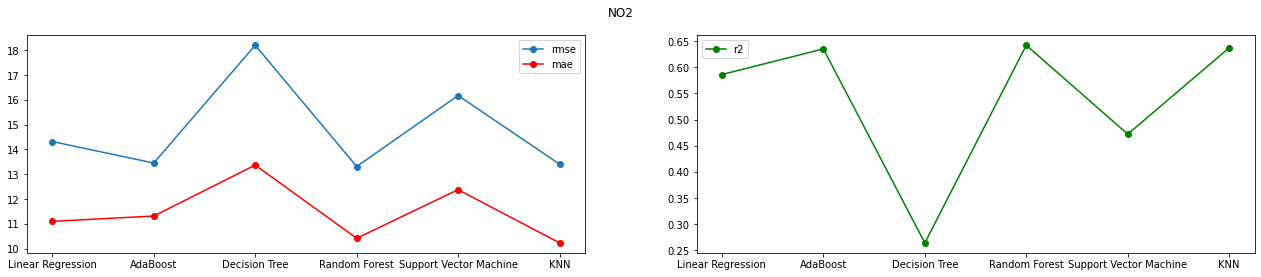

In [ ]:
plt.figure(figsize=(22,4))
plt.suptitle('NO2')

plt.subplot(1,2,1)
plt.plot(names, rmse_val, marker='o', label='rmse')
plt.plot(names, mae_val, marker='o', color='r', label='mae')
plt.legend()

plt.subplot(1,2,2)
plt.plot(names, r2_val, marker='o', color='g', label='r2')
plt.legend()
plt.show()

#CO

In [ ]:
df.columns

Index(['Date', 'PM25', 'PM10', 'NO2', 'CO', 'Ozone'], dtype='object')

In [ ]:
col_ = ['PM25', 'PM10', 'NO2', 'Ozone']

In [ ]:
col_

['PM25', 'PM10', 'NO2', 'Ozone']

In [ ]:
#defining feature (X) and target (y)
X = df[col_]    #X-input features
y = df.iloc[:,4]  #y-input features

#Normalize Feature variable
ss = StandardScaler()
X_std = ss.fit_transform(X)     #apply stardardisation

#Train test split with test size 20% and train size as 80%
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=1)

print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)
print('Training data size:',y_train.shape)
print('Test data size:',y_test.shape)

Training data size: (292, 4)
Test data size: (73, 4)
Training data size: (292,)
Test data size: (73,)


In [ ]:
names = []
r2_val = []
rmse_val = []
mae_val = []

In [ ]:
#Linear Regression

lr = LinearRegression()
lr_model = lr.fit(X_train,y_train)          #fit the linear model on train data

#Prediction
y_pred = lr_model.predict(X_test)                   #predict using the model

r2 = r2_score(y_test,y_pred)                        #calculate r2
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))   #calculate rmse
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,y_pred)            #calculate mae
print('MAE of model:',mae)

name = 'Linear Regression'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.4022050772200223
RMSE of model: 0.3858945863799323
MAE of model: 0.28115899469076183


In [ ]:
#Ada Boost Regressor

abr = AdaBoostRegressor()
abr_model = abr.fit(X_train,y_train)

y_pred = abr_model.predict(X_test)
r2 = r2_score(y_test,y_pred)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,y_pred)
print('MAE of model:',mae)

name = 'AdaBoost'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.3865571656417335
RMSE of model: 0.39091255939258607
MAE of model: 0.3032505839474391


In [ ]:
#Decision Tree Regression

dt_one_reg = DecisionTreeRegressor()

dt_model = dt_one_reg.fit(X_train,y_train)
y_pred_dtone = dt_model.predict(X_test)
r2 = r2_score(y_pred_dtone,y_test)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_pred_dtone,y_test))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_pred_dtone,y_test)
print('MAE of model:',mae)

name = 'Decision Tree'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: -0.13444642751437752
RMSE of model: 0.5545764915732972
MAE of model: 0.33260961358447494


In [ ]:
#Random Forest Regression

rf_reg=RandomForestRegressor()

#Fit the RF model and predict
rf_model = rf_reg.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)

r2 = r2_score(y_test,y_pred_rf)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,y_pred_rf)
print('MAE of model:',mae)

name = 'Random Forest'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.4436076196942522
RMSE of model: 0.372291535241874
MAE of model: 0.25271591790091325


In [ ]:
#Support Vector Machine

sv_reg = SVR()
sv_model = sv_reg.fit(X_train,y_train)

y_pred_sv=sv_model.predict(X_test)

r2 = r2_score(y_test,y_pred_sv)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_sv))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,y_pred_sv)
print('MAE of model:',mae)

name = 'Support Vector Machine'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.5058202999476731
RMSE of model: 0.35086094249287064
MAE of model: 0.23684270950346517


In [ ]:
#KNN REGRESSOR

knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

r2 = r2_score(y_test, pred)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,pred)
print('MAE of model:',mae)

R^2 of model: -0.032017282241250555
RMSE of model: 0.5070328060437622
MAE of model: 0.30639514901369863


In [ ]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

r2 = r2_score(y_test, pred)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,pred)
print('MAE of model:',mae)

name = 'KNN'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.4511902426502862
RMSE of model: 0.36974600221752485
MAE of model: 0.25164253799217223


In [ ]:
for i in range(6):
    print('%s: %f' % (names[i], r2_val[i]))

Linear Regression: 0.402205
AdaBoost: 0.386557
Decision Tree: -0.134446
Random Forest: 0.443608
Support Vector Machine: 0.505820
KNN: 0.451190


In [ ]:
for i in range(6):
    print('%s: %f' % (names[i], rmse_val[i]))

Linear Regression: 0.385895
AdaBoost: 0.390913
Decision Tree: 0.554576
Random Forest: 0.372292
Support Vector Machine: 0.350861
KNN: 0.369746


In [ ]:
for i in range(6):
    print('%s: %f' % (names[i], mae_val[i]))

Linear Regression: 0.281159
AdaBoost: 0.303251
Decision Tree: 0.332610
Random Forest: 0.252716
Support Vector Machine: 0.236843
KNN: 0.251643


In [ ]:
r2_val = list(np.around(np.array(r2_val),3))
rmse_val = list(np.around(np.array(rmse_val),3))
mae_val = list(np.around(np.array(mae_val),3))

In [ ]:
from prettytable import PrettyTable
t = PrettyTable(['Regression Model','R^2', 'RMSE', 'MAE'])
t.title = 'CO'
for i in range(6):
  t.add_row([names[i], r2_val[i], rmse_val[i], mae_val[i]])
print(t)

+-------------------------------------------------+
|                        CO                       |
+------------------------+--------+-------+-------+
|    Regression Model    |  R^2   |  RMSE |  MAE  |
+------------------------+--------+-------+-------+
|   Linear Regression    | 0.402  | 0.386 | 0.281 |
|        AdaBoost        | 0.387  | 0.391 | 0.303 |
|     Decision Tree      | -0.134 | 0.555 | 0.333 |
|     Random Forest      | 0.444  | 0.372 | 0.253 |
| Support Vector Machine | 0.506  | 0.351 | 0.237 |
|          KNN           | 0.451  |  0.37 | 0.252 |
+------------------------+--------+-------+-------+


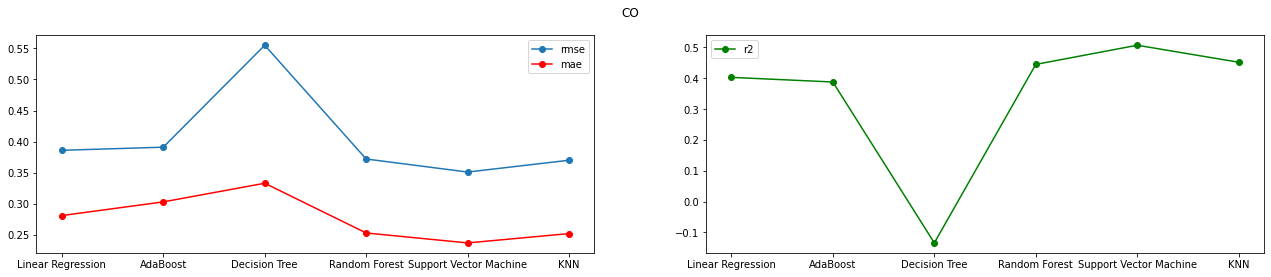

In [ ]:
plt.figure(figsize=(22,4))
plt.suptitle('CO')

plt.subplot(1,2,1)
plt.plot(names, rmse_val, marker='o', label='rmse')
plt.plot(names, mae_val, marker='o', color='r', label='mae')
plt.legend()

plt.subplot(1,2,2)
plt.plot(names, r2_val, marker='o', color='g', label='r2')
plt.legend()
plt.show()

#Ozone

In [ ]:
df.columns

Index(['Date', 'PM25', 'PM10', 'NO2', 'CO', 'Ozone'], dtype='object')

In [ ]:
col_ = ['PM25', 'PM10', 'NO2', 'CO']

In [ ]:
col_

['PM25', 'PM10', 'NO2', 'CO']

In [ ]:
#defining feature (X) and target (y)
X = df[col_]    #X-input features
y = df.iloc[:,5]  #y-input features

#Normalize Feature variable
ss = StandardScaler()
X_std = ss.fit_transform(X)     #apply stardardisation

#Train test split with test size 20% and train size as 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)
print('Training data size:',y_train.shape)
print('Test data size:',y_test.shape)

Training data size: (292, 4)
Test data size: (73, 4)
Training data size: (292,)
Test data size: (73,)


In [ ]:
names = []
r2_val = []
rmse_val = []
mae_val = []

In [ ]:
#Linear Regression

lr = LinearRegression()
lr_model = lr.fit(X_train,y_train)          #fit the linear model on train data

LinearRegression(normalize=False)

#Prediction
y_pred = lr_model.predict(X_test)                   #predict using the model

r2 = r2_score(y_test,y_pred)                        #calculate r2
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))   #calculate rmse
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,y_pred)            #calculate mae
print('MAE of model:',mae)

name = 'Linear Regression'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.30183900685411214
RMSE of model: 15.403302068595067
MAE of model: 11.242776816426746


In [ ]:
#Ada Boost Regressor

abr = AdaBoostRegressor()
abr_model = abr.fit(X_train,y_train)

y_pred = abr_model.predict(X_test)
r2 = r2_score(y_test,y_pred)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,y_pred)
print('MAE of model:',mae)

name = 'AdaBoost'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.300744421527541
RMSE of model: 15.415372082064607
MAE of model: 11.779231721660835


In [ ]:
#Decision Tree Regression

dt_one_reg = DecisionTreeRegressor()

dt_model = dt_one_reg.fit(X_train,y_train)
y_pred_dtone = dt_model.predict(X_test)
r2 = r2_score(y_test,y_pred_dtone)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_dtone))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,y_pred_dtone)
print('MAE of model:',mae)

name = 'Decision Tree'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.21759758258317463
RMSE of model: 16.306138761012683
MAE of model: 12.424802130913243


In [ ]:
#Random Forest Regression

rf_reg=RandomForestRegressor()

#Fit the RF model and predict
rf_model = rf_reg.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)

r2 = r2_score(y_test,y_pred_rf)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,y_pred_rf)
print('MAE of model:',mae)

name = 'Random Forest'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.45415771483848844
RMSE of model: 13.61976550058108
MAE of model: 10.522380593626945


In [ ]:
#Support Vector Machine

sv_reg = SVR()
sv_model = sv_reg.fit(X_train,y_train)

y_pred_sv=sv_model.predict(X_test)

r2 = r2_score(y_test,y_pred_sv)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_sv))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,y_pred_sv)
print('MAE of model:',mae)

name = 'Support Vector Machine'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.2868753558275068
RMSE of model: 15.567496059025062
MAE of model: 11.897652927046073


In [ ]:
#KNN REGRESSOR

knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

r2 = r2_score(y_test, pred)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,pred)
print('MAE of model:',mae)

R^2 of model: 0.33933207558862266
RMSE of model: 14.983996158561775
MAE of model: 11.281088280045664


In [ ]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

r2 = r2_score(y_test, pred)
print('R^2 of model:',r2)
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE of model:',rmse)
mae = mean_absolute_error(y_test,pred)
print('MAE of model:',mae)

name = 'KNN'
r2_val.append(r2)
rmse_val.append(rmse)
mae_val.append(mae)
names.append(name)

R^2 of model: 0.4127118263185168
RMSE of model: 14.127381386693603
MAE of model: 10.679024244422703


In [ ]:
for i in range(6):
    print('%s: %f' % (names[i], r2_val[i]))

Linear Regression: 0.301839
AdaBoost: 0.300744
Decision Tree: 0.217598
Random Forest: 0.454158
Support Vector Machine: 0.286875
KNN: 0.412712


In [ ]:
for i in range(6):
    print('%s: %f' % (names[i], rmse_val[i]))

Linear Regression: 15.403302
AdaBoost: 15.415372
Decision Tree: 16.306139
Random Forest: 13.619766
Support Vector Machine: 15.567496
KNN: 14.127381


In [ ]:
for i in range(6):
    print('%s: %f' % (names[i], mae_val[i]))

Linear Regression: 11.242777
AdaBoost: 11.779232
Decision Tree: 12.424802
Random Forest: 10.522381
Support Vector Machine: 11.897653
KNN: 10.679024


In [ ]:
r2_val = list(np.around(np.array(r2_val),3))
rmse_val = list(np.around(np.array(rmse_val),3))
mae_val = list(np.around(np.array(mae_val),3))

In [ ]:
from prettytable import PrettyTable
t = PrettyTable(['Regression Model','R^2', 'RMSE', 'MAE'])
t.title = 'Ozone'
for i in range(6):
  t.add_row([names[i], r2_val[i], rmse_val[i], mae_val[i]])
print(t)

+--------------------------------------------------+
|                      Ozone                       |
+------------------------+-------+--------+--------+
|    Regression Model    |  R^2  |  RMSE  |  MAE   |
+------------------------+-------+--------+--------+
|   Linear Regression    | 0.302 | 15.403 | 11.243 |
|        AdaBoost        | 0.301 | 15.415 | 11.779 |
|     Decision Tree      | 0.218 | 16.306 | 12.425 |
|     Random Forest      | 0.454 | 13.62  | 10.522 |
| Support Vector Machine | 0.287 | 15.567 | 11.898 |
|          KNN           | 0.413 | 14.127 | 10.679 |
+------------------------+-------+--------+--------+


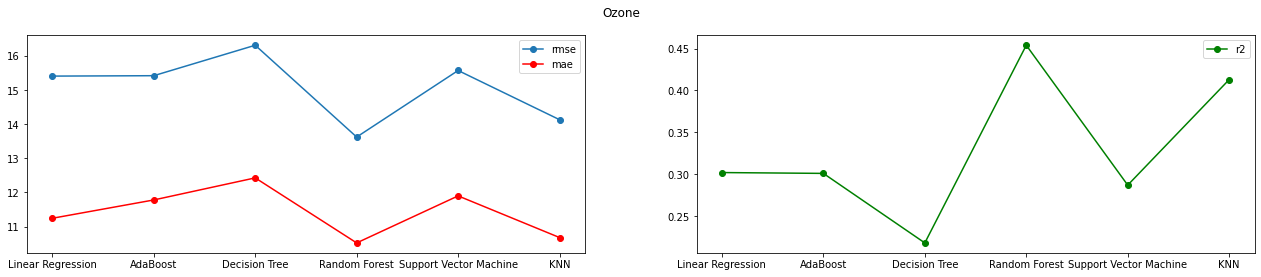

In [ ]:
plt.figure(figsize=(22,4))
plt.suptitle('Ozone')

plt.subplot(1,2,1)
plt.plot(names, rmse_val, marker='o', label='rmse')
plt.plot(names, mae_val, marker='o', color='r', label='mae')
plt.legend()

plt.subplot(1,2,2)
plt.plot(names, r2_val, marker='o', color='g', label='r2')
plt.legend()
plt.show()